In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
dataset_name = 'n_changes_experiment/'
with open(dataset_name+'all_metrics.csv', 'w') as file:
    with open(dataset_name+'all_metrics.txt') as f:
        n = 0
        for line in f:
            if n!= 0:
                line = line[2:-5]
                exp_v = line.split('v')[1].split('_')[0]
                exp_name = line.split('_v')[0]
                seq_len = exp_name.split('_')[0]
                exp_name = exp_name.split('_')[-1]
                exp_type = line.split('_')[-2][:3]
                dataset = line.split('_')[-1].split("'")[0]
                exp_n = exp_name.split('-')[0]
                if exp_n.isdigit():
                    exp_name = '-'.join(exp_name.split('-')[1:])
                else:
                    exp_n = ''
                df_line = dataset+','+ exp_name +','+seq_len+','+exp_n+','+ exp_v +','+ exp_type +','
                for l in line.split(',')[1:]:
                    df_line += l + ','
                df_line = df_line.replace(' ', '')
            if n == 0:
                df_line = 'dataset,name,seq_len,n,v,exp_type,area,cover2,f12,f1r2,cover5,f15,f1r5,cover7,f17,f1r7'
            file.write(df_line+'\n')
            n+=1
file.close()
f.close()
file = dataset_name+'all_metrics.csv'
df = pd.read_csv(file, index_col=False)
#df_area = df_area.sort_values(by=['name', 'n', 'v'])
df

,dataset,name,seq_len,n,v,exp_type,area,cover2,f12,f1r2,cover5,f15,f1r5,cover7,f17,f1r7
0,2changes,3masks,64,NaN,0,cpd,713.120000,0.651797,NaN,0.000000,0.651797,NaN,0.000000,0.651797,NaN,0.000000
1,2changes,triang-1diag,64,10.0,0,cpd,737.866667,0.639714,NaN,0.000000,0.639714,NaN,0.000000,0.639714,NaN,0.000000
2,2changes,rnn,64,NaN,0,cpd,280.226460,0.983923,0.494810,0.951049,0.983600,0.493080,0.952880,0.985023,0.493080,0.954545
3,2changes,transformer,64,NaN,0,cpd,736.053333,0.640599,NaN,0.000000,0.640599,NaN,0.000000,0.640599,NaN,0.000000
4,4changes,3masks,64,NaN,0,cpd,743.440000,0.636992,NaN,0.000000,0.636992,NaN,0.000000,0.636992,NaN,0.000000
5,4changes,rnn,64,NaN,0,cpd,293.348673,0.986904,0.499169,0.914987,0.985236,0.499167,0.913082,0.986182,0.499167,0.914838
6,4changes,transformer,64,NaN,0,cpd,741.813333,0.637786,NaN,0.000000,0.637786,NaN,0.000000,0.637786,NaN,0.000000
7,4changes,triang-1diag,64,10.0,0,cpd,721.360000,0.647773,NaN,0.000000,0.647773,NaN,0.000000,0.647773,NaN,0.000000


In [37]:
df[df['exp_type']=='bce']

,dataset,name,seq_len,n,v,exp_type,area,cover2,f12,f1r2,cover5,f15,f1r5,cover7,f17,f1r7


In [38]:
def plot_all_models(   exp_type='cpd', score_name='cover', threshold='', fig=20):
    figure = plt.figure(figsize=(fig, fig/2))
    # Set layout with background color you want (rgba values)
    # This one is for white background
    #exp_names = ['diag', 'triang-3diag', 'triang-1diag'] 
    exp_names = ['triang-1diag'] 
    N = 10
    j = 0
    cs = [10, 15, 26]
    for exp_name in exp_names:
        d1=df[df['name'] == exp_name] 
        df_type = d1[d1['exp_type'] == exp_type]
        df_v_type = df_type[df_type['v']==0].sort_values(by=['n'])
        ns = np.array(df_v_type['n'])
        mean_scores = []
        std_scores = []
        if score_name == 'f1' or score_name == 'cover':
            score_name += str(threshold)
            
        for i in range(len(ns)):
                df_n_type = df_type[df_type['n']==ns[i]]
                mean_scores.append( df_n_type[score_name].mean())
                std_scores.append(df_n_type[score_name].std())
        mean_scores = np.array(mean_scores)
        std_scores = np.array(std_scores)
        
        if exp_name == 'diag':
            label = 'Diagonal mask'
          
        if exp_name == 'triang-3diag':
            label = 'Tri-diagonal and lower triangular  mask'
        if exp_name == 'triang-1diag':
            label = 'One-diagonal and lower triangular mask'
            
        plt.plot(ns, mean_scores, '-', label = label,linewidth=5,)
        print(ns)
        print(exp_name, mean_scores)
        print(exp_name, std_scores)
      
        plt.fill_between(ns, mean_scores - std_scores, mean_scores + std_scores,
                  alpha=0.12)
        #print(std_scores)
    d1=df[df['name'] == 'rnn'] 
    df_type = d1[d1['exp_type'] == exp_type]
    rnn = df_type[score_name].mean()
    
    #print('rnn', rnn)

    plt.plot(ns, [rnn]*np.size(ns), '--', label = 'RNN-based', c='black', linewidth=5)
    
    plt.xlabel('N, number of elements',fontsize=45, y=20.12)
    plt.tick_params(axis='x', labelsize=30)
    plt.tick_params(axis='y', labelsize=30, pad = 0)
    if score_name == 'cover':
        #plt.ylim([0.9625, 0.982]) #for cover 
        score_name = 'covering'
    if score_name == 'f1':
        score_name = 'f1 metric'
        #plt.ylim([0.63, 0.70]) #for f1
    if score_name == 'area':
        score_name = 'area under the detection curve'
        #plt.ylim([175, 350]) #for area
        #plt.ylim([200, 270])
    plt.legend(fontsize=28)
    plt.ylabel(score_name[0].upper()+score_name[1:], fontsize=45)

    plt.savefig(score_name+'_'+exp_type+'.svg')
    plt.savefig(score_name+'_'+exp_type+'.png')

In [39]:
def plot_rnn_seq_len(  exp_type='cpd', score_name='cover', threshold='2', fig=20):
        #figure = plt.figure(figsize=(fig, fig/2))
        exp_name = 'rnn'
        d1=df[df['name'] == exp_name] 
        df_type = d1[d1['exp_type'] == exp_type]
        
        df_v_type = df_type[df_type['v']==0].sort_values(by=['seq_len'])
        seq_lens = np.array(df_v_type['seq_len'].unique() )
        #print(df_v_type)
        mean_scores = []
        std_scores = []
            
        for i in range(len(seq_lens)):
                df_n_type = df_type[df_type['seq_len']==seq_lens[i]]
                
                mean_scores.append( df_n_type[score_name+threshold].mean())
                std_scores.append(df_n_type[score_name+threshold].std())
        mean_scores = np.array(mean_scores)
        std_scores = np.array(std_scores)
        
        label = 'rnn'  
        plt.scatter(seq_lens, mean_scores, label = label)

        #plt.plot(seq_lens, mean_scores, '-', label = label, linewidth=5,)
        #print(exp_name, mean_scores)
        #print(exp_name, std_scores)
        #plt.fill_between(seq_lens, mean_scores - std_scores, mean_scores + std_scores,
        #          alpha=0.12)
        #print(std_scores)

In [40]:
def plot_seq_len( exp_names, n_diag=0, n_1diagtr=0, dataset_name='2changes',  exp_type='cpd', score_name='cover', threshold='', fig=20):
    figure = plt.figure(figsize=(fig, fig/2))
    # Set layout with background color you want (rgba values)
    # This one is for white background
    #exp_names = ['diag', 'triang-3diag', 'triang-1diag'] 
    for exp_name in exp_names:
        
        d1=df[df['name'] == exp_name] 
        d1 = d1[d1['dataset' ] == dataset_name]
        df_type = d1[d1['exp_type'] == exp_type]
        if exp_name == '3masks':
            df_v_type = df_type[df_type['v']==0].sort_values(by=['seq_len'])
        if exp_name == 'triang-1diag':
            df_v_type = df_type[df_type['v']==0].sort_values(by=['seq_len'])
            print(df_v_type)
        else:
            df_v_type = df_type[df_type['v']==0].sort_values(by=['seq_len'])

        seq_lens = np.array(df_v_type['seq_len'].unique() )

        mean_scores = []
        std_scores = []
        for i in range(len(seq_lens)):
                df_n_type = df_type[df_type['seq_len']==seq_lens[i]]
                if n_diag != 0 and exp_name == 'diag':
                        df_n_type = df_n_type[df_n_type['n'] == n_diag]
                if n_1diagtr != 0 and exp_name == 'triang-1diag':
                        df_n_type = df_n_type[df_n_type['n'] == n_1diagtr]
                mean_scores.append( df_n_type[score_name+threshold].mean())
                std_scores.append(df_n_type[score_name+threshold].std())
        mean_scores = np.array(mean_scores)
        std_scores = np.array(std_scores)
        #print(exp_name, seq_lens, mean_scores)
                
        if exp_name == 'triang-1diag':
            if n_1diagtr == 0: 
                n_1diagtr = ''
            else: 
                n_1diagtr = str(n_1diagtr) + '-'
            label = 'one-diagonal and '+n_1diagtr+'lower triangular mask'
        elif exp_name == 'diag':
            if n_diag == 0: 
                n_diag = ''
            else: 
                n_diag = str(n_diag) + '-'
            label = n_diag + 'diagonal mask'
        elif exp_name == 'triang':
            label = 'triangular mask'
        elif exp_name == '3masks':
            label = '3 masks for diff. layers' 
        elif exp_name == 'transformer':
            label = exp_name
        plt.scatter(seq_lens, mean_scores, label = label)
        #plt.plot(seq_lens, mean_scores, '-', label = label, linewidth=5,)
        #print(exp_name, mean_scores)
        #print(exp_name, std_scores)
        #plt.fill_between(seq_lens, mean_scores - std_scores, mean_scores + std_scores,
        #          alpha=0.12)
        #print(std_scores)
  
    #d1=df[df['name'] == 'rnn'] 
    #df_type = d1[d1['exp_type'] == exp_type].sort_values(by='seq_len')
    #rnn = df_type[score_name].mean()
    #print('rnn', rnn)
    #plt.plot(seq_lens, rnn, '--', label = 'RNN-based', c='black', linewidth=5)
    plot_rnn_seq_len(  exp_type=exp_type, score_name=score_name, threshold=threshold)
    
    plt.xlabel('N, number of elements in seq',fontsize=45, y=20.12)
    plt.tick_params(axis='x', labelsize=30)
    plt.tick_params(axis='y', labelsize=30, pad = 0)
    if score_name == 'cover':
        #plt.ylim([0.9625, 0.982]) #for cover 
        score_name = 'covering'
    if score_name[:1] == 'f1':
        score_name = 'f1 metric'
        #plt.ylim([0.63, 0.70]) #for f1
    if score_name == 'area':
        score_name = 'area under the detection curve'
        #plt.ylim([175, 350]) #for area
        #plt.ylim([200, 270])
    plt.legend(fontsize=18)
    plt.ylabel(score_name[0].upper()+score_name[1:], fontsize=45)

    #plt.savefig(score_name+'_'+exp_type+'.svg')
    #plt.savefig(score_name+'_'+exp_type+'.png')

In [41]:
df.sort_values(by=['dataset', 'cover2'])

,dataset,name,seq_len,n,v,exp_type,area,cover2,f12,f1r2,cover5,f15,f1r5,cover7,f17,f1r7
1,2changes,triang-1diag,64,10.0,0,cpd,737.866667,0.639714,NaN,0.000000,0.639714,NaN,0.000000,0.639714,NaN,0.000000
3,2changes,transformer,64,NaN,0,cpd,736.053333,0.640599,NaN,0.000000,0.640599,NaN,0.000000,0.640599,NaN,0.000000
0,2changes,3masks,64,NaN,0,cpd,713.120000,0.651797,NaN,0.000000,0.651797,NaN,0.000000,0.651797,NaN,0.000000
2,2changes,rnn,64,NaN,0,cpd,280.226460,0.983923,0.494810,0.951049,0.983600,0.493080,0.952880,0.985023,0.493080,0.954545
4,4changes,3masks,64,NaN,0,cpd,743.440000,0.636992,NaN,0.000000,0.636992,NaN,0.000000,0.636992,NaN,0.000000
6,4changes,transformer,64,NaN,0,cpd,741.813333,0.637786,NaN,0.000000,0.637786,NaN,0.000000,0.637786,NaN,0.000000
7,4changes,triang-1diag,64,10.0,0,cpd,721.360000,0.647773,NaN,0.000000,0.647773,NaN,0.000000,0.647773,NaN,0.000000
5,4changes,rnn,64,NaN,0,cpd,293.348673,0.986904,0.499169,0.914987,0.985236,0.499167,0.913082,0.986182,0.499167,0.914838


In [44]:
df[['dataset', 'name', 'n', 'exp_type', 'area', 'cover2', 'f12', 'f1r2']].sort_values(by=['dataset', 'cover2'])

,dataset,name,n,exp_type,area,cover2,f12,f1r2
1,2changes,triang-1diag,10.0,cpd,737.866667,0.639714,NaN,0.000000
3,2changes,transformer,NaN,cpd,736.053333,0.640599,NaN,0.000000
0,2changes,3masks,NaN,cpd,713.120000,0.651797,NaN,0.000000
2,2changes,rnn,NaN,cpd,280.226460,0.983923,0.494810,0.951049
4,4changes,3masks,NaN,cpd,743.440000,0.636992,NaN,0.000000
6,4changes,transformer,NaN,cpd,741.813333,0.637786,NaN,0.000000
7,4changes,triang-1diag,10.0,cpd,721.360000,0.647773,NaN,0.000000
5,4changes,rnn,NaN,cpd,293.348673,0.986904,0.499169,0.914987


    dataset          name  seq_len     n  v exp_type    area    cover2  f12  \
7  4changes  triang-1diag       64  10.0  0      cpd  721.36  0.647773  NaN   

   f1r2    cover5  f15  f1r5    cover7  f17  f1r7  
7   0.0  0.647773  NaN   0.0  0.647773  NaN   0.0  


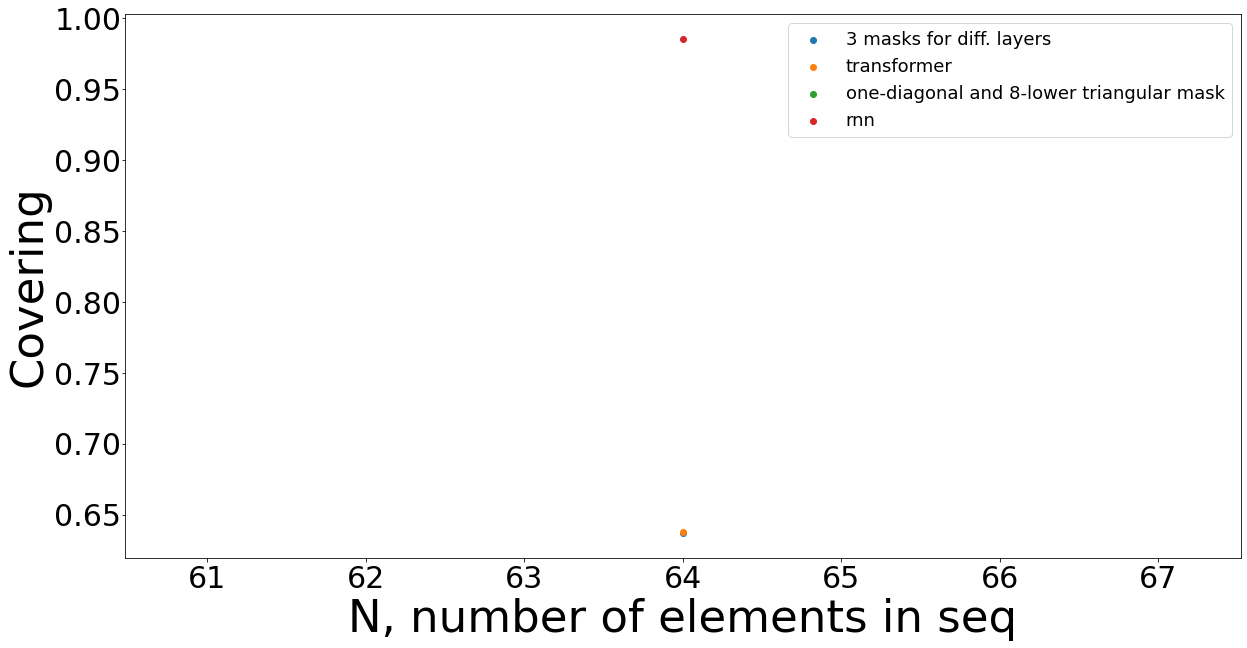

In [42]:
plot_seq_len( exp_names = ['3masks', 'transformer',
                           'triang-1diag'],
             n_diag=0, n_1diagtr=8,  exp_type='cpd', score_name='cover', threshold='7', dataset_name = '4changes', fig=20)